In [10]:
#Imports

import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import re

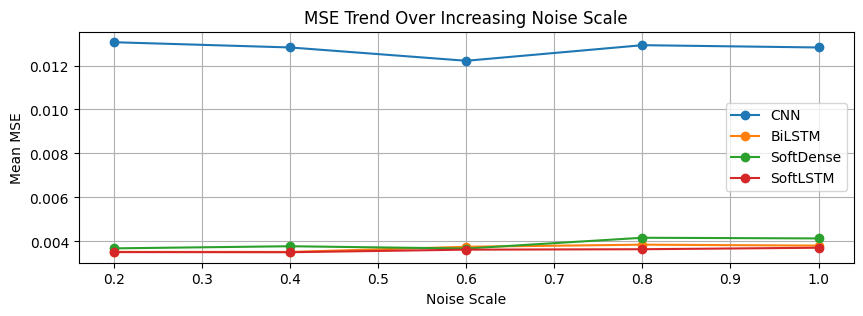

In [31]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import re

# Directory where the files are located
directory = "results/"

# Regex pattern to extract the number (e.g., "02") from filenames like 'FL_Load_POISON_BuildD02_aggregated_results.pkl'
pattern = re.compile(r'\d+')
noise_scale_mapping = {
    1: 1,
    2: 0.2,
    4: 0.4,
    6: 0.6,
    8: 0.8
}

# List to store results
results = []

# Iterate through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.pkl') and '_aggregated_' in filename:
        file_path = os.path.join(directory, filename)
        match = pattern.search(filename)

        if match:
            extracted_number = int(match.group(0))
            noise_scale = noise_scale_mapping.get(extracted_number, None)

            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                
                # Append the results as a dictionary
                results.append({
                    'noise_scale': noise_scale,
                    'cnn_mse': data["cnn_results"]["mse"][1],
                    'bilstm_mse': data["bilstm_results"]["mse"][1],
                    'softdense_mse': data["softdense_results"]["mse"][1],
                    'softlstm_mse': data["softlstm_results"]["mse"][1]
                })

# Convert the results list to a DataFrame
df = pd.DataFrame(results)

# Sort the DataFrame by noise_scale for plotting purposes
df = df.sort_values(by='noise_scale')

# Plot the MSE trend for each model over the increase of noise scale
plt.figure(figsize=(10, 3))
plt.plot(df['noise_scale'], df['cnn_mse'], label='CNN', marker='o')
plt.plot(df['noise_scale'], df['bilstm_mse'], label='BiLSTM', marker='o')
plt.plot(df['noise_scale'], df['softdense_mse'], label='SoftDense', marker='o')
plt.plot(df['noise_scale'], df['softlstm_mse'], label='SoftLSTM', marker='o')

# Add labels and title
plt.xlabel('Noise Scale')
plt.ylabel('Mean MSE')
plt.title('MSE Trend Over Increasing Noise Scale')
plt.legend()
plt.grid(True)
plt.show()
